# Aprender a programar Basic set up

notebook exploring LDA to see the number of clusters generated fr the survey data. To examine the best number of clusters we use coherence score c_v and u_mass; other methods like  silhouette coefﬁcient are not appropiate for LDA direct output data.


-Results : obtained scores were low in general and very inconsistent.

-Remarks:
* the model is very sensitive, and small changes in the nomalization or preprocessing make complete different clusters and coherenec scores

#### install libraries

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
!pip install -U spacy
!python -m spacy download es
!python -m spacy download es_core_news_md
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-25 01:30:41.270343: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package na

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2c124e1e23a6d949b4731594c2dbe68ddcda053fb30c9963ff9a103ac12fd35a
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=1e8200fdd91d209fdf35f39d7a039e4d23a3720c481a201dad49663bea69b6b3
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
import pandas as pd
import string
import seaborn as sns
nlp = spacy.load('es_core_news_md')

In [ ]:
#from google.colab import files
#upload = files.upload()
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
df = pd.read_csv(r'/content/mydrive/MyDrive/luis/study/master/tesis/automaticLabels/aprenderAProgramarfinalDataFrame.csv',sep=';')
df.head()

,comment,ambiente,bondadesPlataforma,CbondadesPlataformaCcasosPrueba,CbondadesPlataformaCconocerErrores,CbondadesPlataformaCconsejosFormativos,CbondadesPlataformaCdisponibilidadLinea,CbondadesPlataformaCespacioTrabajo,CbondadesPlataformaCfacilidadUso,CbondadesPlataformaClenguajes,...,ClogrosPedagogicosCresolucionProblemas,CMejorableAprenderProgramarCfallasGenerales,CMejorableAprenderProgramarCinflexibilidad,CMejorableAprenderProgramarCobjetivoEducativo,CMejorableAprenderProgramarCretroalimentacionInsuficiente,CMejorableAprenderProgramarCsustituible,colab,HerramientasUNcode,logrosPedagogicos,MejorableAprenderProgramar
0,A traves de la plataforma pude ir practicando ...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A traves de los ejercicios propuestos en la he...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,A veces UNCode no dejaba correr por cosas triv...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,A veces es poco practico y da errores por cosa...,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,"A veces la pagina era muy lenta, y al principi...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(347, 29)

#### basic text cleaning

In [ ]:
df["comment"] = df["comment"].fillna("")
# for col in text_columns: # change df tyoes to string, it it is not
#     df[col] = df[col].astype(str)

In [ ]:
#limpieza basica que aplica para todo metodo sin importar cual sera
#method that overrides the given dataframe text, with a cleaned version
def clean(textArray):
  res= []
  for i in range(0,len(textArray)):
    text = textArray[i]
    #text = p.clean(text)
    text = re.sub(r'\W+', ' ', text)  # remove non-alphanumeric characters
    text = re.sub(r"\d+", "number", text)# replace numbers with the word 'number'
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    # text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    # text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation
    # don't consider sentenced with less than 3 words (i.e. assumed noise)
    #if len(text.strip().split()) < 3:
    #     return None
    text = text.lower()  # lower case everything
    test = text.strip() # remove redundant spaces
    textArray[i] = text
  return

In [ ]:
clean(df.comment) # df.comment will be cleaned and overwriten

<ipython-input-7-8b69cfd8186a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textArray[i] = text


In [ ]:
df.head(3)

,comment,ambiente,bondadesPlataforma,CbondadesPlataformaCcasosPrueba,CbondadesPlataformaCconocerErrores,CbondadesPlataformaCconsejosFormativos,CbondadesPlataformaCdisponibilidadLinea,CbondadesPlataformaCespacioTrabajo,CbondadesPlataformaCfacilidadUso,CbondadesPlataformaClenguajes,...,ClogrosPedagogicosCresolucionProblemas,CMejorableAprenderProgramarCfallasGenerales,CMejorableAprenderProgramarCinflexibilidad,CMejorableAprenderProgramarCobjetivoEducativo,CMejorableAprenderProgramarCretroalimentacionInsuficiente,CMejorableAprenderProgramarCsustituible,colab,HerramientasUNcode,logrosPedagogicos,MejorableAprenderProgramar
0,a traves de la plataforma pude ir practicando ...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a traves de los ejercicios propuestos en la he...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,a veces uncode no dejaba correr por cosas triv...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### advance data transformation step to convert similar words so results are more reliable

In [ ]:
#limpieza basica que aplica para todo metodo sin importar cual sera
#method that overrides the given dataframe text, with a cleaned version
def advanceCleaning(textArray):
  res= []
  for i in range(0,len(textArray)):
    text = textArray[i]
    #text = p.clean(text)
    text = re.sub(r"uncode|plataforma|herramienta", "uncode", text)  # Remove multiple spaces in content
    textArray[i] = text
  return

In [ ]:
advanceCleaning(df.comment) # df.comment will be cleaned and overwriten

<ipython-input-10-7c3ca0ee05e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textArray[i] = text


### put resulting cleaned text into a variable

In [ ]:
comments = df.comment
comments.to_numpy()

array(['a traves de la uncode pude ir practicando para mejorar las habilidades en programacion',
       'a traves de los ejercicios propuestos en la uncode uncode se pone a prueba lo aprendido en las clases de programacion ayudando a validar los temas vistos con la practica que conlleva realizar ejercicios',
       'a veces uncode no dejaba correr por cosas triviales como un espacio aunque ingresar entradas aqui era mas facil que ingrsarlas en colaboratory',
       'a veces es poco practico y da errores por cosas que no deberia',
       'a veces la pagina era muy lenta y al principio de semestre no daba las correcciones pertinentes ni los inputs que no funcionaban sin embargo los ejercicios eran utiles para ahondar en los temas ',
       'a veces no valoraba bien el porcentaje de el codigo correcto',
       'al poder probar y visualizar codigos me permitio comprender el funcionamiento y aplicar logica',
       'al principio uncode presentaba bastantes fallos a veces no ejecutaba bien l

#### Aditional optional text cleaning/normalization

In [ ]:
#normalizacion especifica, dependiendo del metodo se puede probar con y sin esta
def normalize(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if t.isalpha()] #len(t) > 3 and
    return lexical_tokens

#otra libreria para eliminar stop words
# import nltk
# from stop_words import get_stop_words
# dataset = ['This','is','just', 'a', 'snake']
# A = [word for word in dataset if word not in get_stop_words('english')]
# print(A)

In [ ]:
textNormalizedCommentsVector = [ ([str(a) for a in normalize(oneComment)]) for oneComment in comments]
textNormalizedCommentsVector[0]

['traves',
 'uncode',
 'pude',
 'practicando',
 'mejorar',
 'habilidades',
 'programacion']

In [ ]:
textNormalizedComments = [ " ".join([str(a) for a in normalize(oneComment)]) for oneComment in comments]
textNormalizedComments[0]

'traves uncode pude practicando mejorar habilidades programacion'

#### stemming optional process to transfrom all word to the root(even if the root does not exist)

In [ ]:
import nltk
from nltk import SnowballStemmer

def stemmize(text):
  spanishstemmer=SnowballStemmer('spanish')
  tokens = normalize(text) # crear una lista de tokens
  stems = [spanishstemmer.stem(token) for token in tokens]
  return stems

In [ ]:
stemmize(textNormalizedComments[0])

['trav', 'uncod', 'pud', 'practic', 'mejor', 'habil', 'programacion']

In [ ]:
dataStemmizedCommentsVector = [ ([str(a) for a in stemmize(oneComment)]) for oneComment in textNormalizedComments]
dataStemmizedCommentsVector[0]

['trav', 'uncod', 'pud', 'practic', 'mejor', 'habil', 'programacion']

#### lemmatization, optional procces to transform words to a common one

In [ ]:
def lemmanize(text):
    doc = nlp(text)
    #lemmas_no_pron = [tok.lemma_.lower() for tok in doc if tok.pos_ != 'PRON'] # we can select the type of tokens that will enter this process, like pronouns, adjetivo, verbo, sustantivo
    #lemmas = [tok.lemma_ for tok in doc if tok.pos_ != 'NOUN']
    lemmas = []
    for tok in doc:
      if tok.pos_ not in ("NOUN", "NUM", "PROPN"):
        lemmas.append((tok.lemma_))
      else:
        lemmas.append((tok.text))
    return lemmas


In [ ]:
lemmanize(textNormalizedComments[0])

['traves',
 'uncode',
 'poder',
 'practicar',
 'mejorar',
 'habilidades',
 'programacion']

In [ ]:
dataLemmatizedCommentsVector = [ ([str(a) for a in lemmanize(oneComment)]) for oneComment in textNormalizedComments]
dataLemmatizedCommentsVector[0]

['traves',
 'uncode',
 'poder',
 'practicar',
 'mejorar',
 'habilidades',
 'programacion']

## LDA

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda

In [ ]:
dataTokenizedReady = dataLemmatizedCommentsVector   #textNormalizedCommentsVector #dataLemmatizedCommentsVector

In [ ]:
id2word = corpora.Dictionary(dataTokenizedReady)

corpus = [id2word.doc2bow(text) for text in dataTokenizedReady]    #unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]   # for document one how many times appears each word

[[('habilidades', 1),
  ('mejorar', 1),
  ('poder', 1),
  ('practicar', 1),
  ('programacion', 1),
  ('traves', 1),
  ('uncode', 1)]]

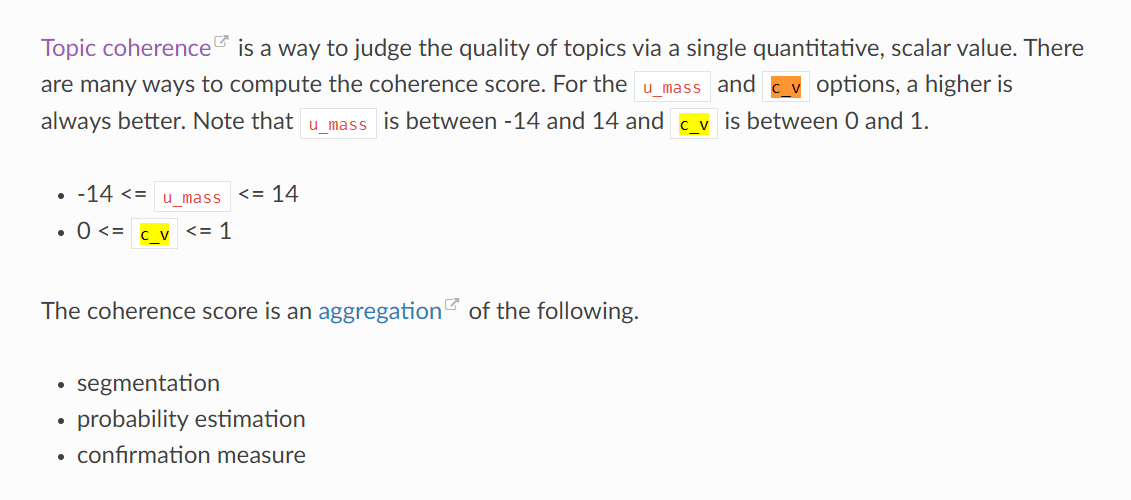

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.087*"problemas" + 0.065*"prueba" + 0.037*"intuitivo" + 0.032*"uncodes" + '
  '0.030*"casos" + 0.030*"persona" + 0.029*"pensar" + 0.028*"cumplir" + '
  '0.027*"ayudar" + 0.024*"completamente"'),
 (1,
  '0.085*"programar" + 0.075*"uncodir" + 0.027*"casos" + 0.027*"bastante" + '
  '0.026*"ayudo" + 0.026*"probar" + 0.025*"ocasiones" + 0.025*"optimo" + '
  '0.024*"posible" + 0.022*"detallado"'),
 (2,
  '0.060*"inmediato" + 0.059*"errores" + 0.052*"podia" + 0.050*"comprobar" + '
  '0.031*"visualizador" + 0.029*"utilizar" + 0.025*"recibir" + 0.024*"ofrecer" '
  '+ 0.023*"calificacion" + 0.023*"personalmente"'),
 (3,
  '0.070*"uncode" + 0.064*"code" + 0.050*"test" + 0.047*"encontrar" + '
  '0.045*"mejorar él" + 0.043*"tema" + 0.034*"efectivo" + 0.032*"ejecucion" + '
  '0.028*"comparacion" + 0.021*"modulo"'),
 (4,
  '0.068*"util" + 0.043*"hora" + 0.042*"probar" + 0.034*"programas" + '
  '0.032*"permitiar" + 0.029*"errores" + 0.028*"escribir" + 0.028*"evaluar" + '
  '0.026*"facilidad" 

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataTokenizedReady, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4064158978582267


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, coherence ='c_v'):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=dataTokenizedReady, start=2, limit=40, step=1, coherence='c_v')

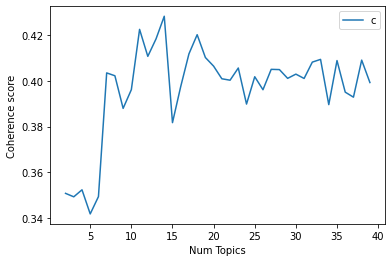

In [ ]:
# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
optimal_model = model_list[10]

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=dataTokenizedReady, start=2, limit=40, step=1, coherence='u_mass')

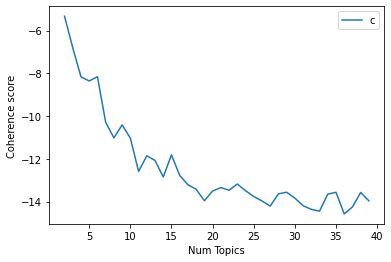

In [ ]:
# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.220053 -0.104549       1        1  16.195563
3      0.096142 -0.003295       2        1  12.729741
9     -0.137651  0.164149       3        1  11.823071
1      0.059991  0.151284       4        1   9.670662
10    -0.037697  0.021021       5        1   8.727536
7     -0.111184 -0.007340       6        1   8.567981
11     0.129563  0.051639       7        1   7.274202
2      0.071313 -0.003610       8        1   5.882854
8     -0.133454 -0.212282       9        1   5.772101
4     -0.039561 -0.063486      10        1   5.375714
0     -0.057199 -0.020962      11        1   4.143893
6     -0.060314  0.027431      12        1   3.836681, topic_info=          Term       Freq      Total Category  logprob  loglift
45      codigo  97.000000  97.000000  Default  30.0000  30.0000
220       paso  45.000000  45.000000  Default  29.0000  29.0000
172   permitir  76.000000  76.000000  Default  28.0000  28.0000
131    uncodes  40.000000  40.000000  Default  27.0000  27.0000
135  problemas  31.000000  31.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
44        util   2.155672  45.706278  Topic12  -4.1244   0.2064
131    uncodes   1.887155  40.116370  Topic12  -4.2574   0.2038
161      tutor   1.056758  18.931493  Topic12  -4.8373   0.3749
6       uncode   1.204674  45.838582  Topic12  -4.7063  -0.3784
177   corregir   0.859627  13.142181  Topic12  -5.0438   0.5335

[521 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
695       9  0.918771    academico
246       4  0.497376      acceder
278      11  0.805418       acerca
458       7  0.924867  actividades
227       2  0.965916     adecuado
...     ...       ...          ...
56        6  0.490230   visualizar
56       10  0.122558   visualizar
56       11  0.183836   visualizar
484       2  0.705168    visualize
312      11  0.679803            x

[563 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 10, 2, 11, 8, 12, 3, 9, 5, 1, 7])

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -5.3333
Num Topics = 3  has Coherence Value of -6.8096
Num Topics = 4  has Coherence Value of -8.1684
Num Topics = 5  has Coherence Value of -8.3598
Num Topics = 6  has Coherence Value of -8.1594
Num Topics = 7  has Coherence Value of -10.2917
Num Topics = 8  has Coherence Value of -11.0203
Num Topics = 9  has Coherence Value of -10.4155
Num Topics = 10  has Coherence Value of -11.0317
Num Topics = 11  has Coherence Value of -12.5892
Num Topics = 12  has Coherence Value of -11.8584
Num Topics = 13  has Coherence Value of -12.0775
Num Topics = 14  has Coherence Value of -12.8484
Num Topics = 15  has Coherence Value of -11.8162
Num Topics = 16  has Coherence Value of -12.7782
Num Topics = 17  has Coherence Value of -13.2114
Num Topics = 18  has Coherence Value of -13.4234
Num Topics = 19  has Coherence Value of -13.9606
Num Topics = 20  has Coherence Value of -13.5044
Num Topics = 21  has Coherence Value of -13.3448
Num Topics = 22  has Coherence Va

#### try PCA to reduce the dimensionality before k-meanss

---



In [ ]:
#https://365datascience.com/tutorials/python-tutorials/pca-k-means/

#### Embeddings stage

#### Kmeans clustering

In [ ]:
#https://github.com/ashishsalunkhe/Topic-Modeling-using-LDA-and-K-Means-Clustering/blob/master/kmeans-cluster-and-topic-modeling.ipynb
#https://github.com/ashishsalunkhe/Topic-Modeling-using-LDA-and-K-Means-Clustering/blob/master/news_exploration_using_gensim_and_sklearn.ipynb

In [ ]:
## nltk example code clusters
from nltk.cluster import KMeansClusterer
import nltk

def clustering_question(data,NUM_CLUSTERS = 15):

    sentences = data['text']

    X = np.array(data['emb'].tolist())

    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    data['cluster'] = pd.Series(assigned_clusters, index=data.index)
    data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])

    return data, assigned_clusters

In [ ]:
#### sklearn example
#https://scikit-learn.org/stable/modules/clustering.html
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data

X = get_document_topicsRaw

sil_score_max = -1 #this is the minimum possible score

for n_clusters in range(2,20):
  model = KMeans(n_clusters = n_clusters, init='k-means++', max_iter=100, n_init=1)
  labels = model.fit_predict(X)
  sil_score = silhouette_score(X, labels)
  print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))
  if sil_score > sil_score_max:
    sil_score_max = sil_score
    best_n_clusters = n_clusters

NameError: ignored

In [ ]:
#https://towardsdatascience.com/latent-semantic-analysis-deduce-the-hidden-topic-from-the-document-f360e8c0614b

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = ["some text", "some other text", "more text"]

tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english', use_idf=True)
X = tfidf_vectorizer.fit_transform(documents)

svd = TruncatedSVD(1000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
Xnew = lsa.fit_transform(X)

model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)
model.fit(Xnew)